In [97]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/bennetyousuf/Desktop/BCS/python-api-challenge/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [92]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [93]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#print Beginning Data Retrieval
print('Beginning Data Retrieval') 
print('________________________')

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping...")

#print Data Retrieval Complete 
print('________________________')
print('Data Retrieval Complete') 
print('________________________')

Beginning Data Retrieval
________________________
Processing record 1|barrow
Processing record 2|mar del plata
Processing record 3|rikitea
Processing record 4|flin flon
Processing record 5|portland
Processing record 6|itoman
Processing record 7|kavaratti
Processing record 8|sherpur
Processing record 9|raudeberg
Processing record 10|punta arenas
City not found. skipping...
Processing record 11|shelburne
Processing record 12|sault sainte marie
Processing record 13|srednekolymsk
Processing record 14|hobart
Processing record 15|boca del rio
Processing record 16|deputatskiy
City not found. skipping...
Processing record 17|chuy
Processing record 18|wenling
Processing record 19|atuona
City not found. skipping...
Processing record 20|tiksi
Processing record 21|mahebourg
Processing record 22|pacific grove
City not found. skipping...
Processing record 23|ushuaia
Processing record 24|port alfred
Processing record 25|champerico
Processing record 26|saskylakh
Processing record 27|busselton
Processi

Processing record 243|molina
Processing record 244|tongliao
Processing record 245|vanavara
Processing record 246|lesnoy
Processing record 247|oron
Processing record 248|akureyri
Processing record 249|mangai
Processing record 250|half moon bay
Processing record 251|karpathos
City not found. skipping...
Processing record 252|riva
Processing record 253|luancheng
Processing record 254|bintulu
Processing record 255|imbituba
Processing record 256|cabedelo
Processing record 257|pacifica
Processing record 258|chicama
Processing record 259|turayf
Processing record 260|mount gambier
Processing record 261|monroe
Processing record 262|develi
Processing record 263|ribeira grande
Processing record 264|sangar
Processing record 265|sabratah
Processing record 266|banda aceh
Processing record 267|miraflores
Processing record 268|bambous virieux
Processing record 269|healdsburg
Processing record 270|kodiak
Processing record 271|thouars
City not found. skipping...
City not found. skipping...
Processing re

Processing record 485|nemuro
Processing record 486|zhigalovo
Processing record 487|bangad
Processing record 488|avera
Processing record 489|faya
Processing record 490|esmeraldas
Processing record 491|port keats
Processing record 492|agadez
Processing record 493|severnyy
Processing record 494|bathsheba
Processing record 495|svatove
Processing record 496|bilibino
Processing record 497|ponta do sol
Processing record 498|bonavista
Processing record 499|demirci
Processing record 500|farafangana
Processing record 501|ormara
Processing record 502|santa helena de goias
Processing record 503|palora
City not found. skipping...
Processing record 504|rio grande
Processing record 505|agucadoura
Processing record 506|walvis bay
Processing record 507|asosa
Processing record 508|tiznit
Processing record 509|naze
Processing record 510|palmer
Processing record 511|aswan
Processing record 512|providencia
Processing record 513|san blas
Processing record 514|meybod
Processing record 515|tabou
Processing re

In [95]:
# Convert Raw Data to DataFrame
# Display the DataFrame
 
    
cities_df = {"City":city_name, 
                        "Lat": lat,
                        "Lng": lng,
                        "Cloudiness": cloudiness, 
                        "Max Temp": max_temp,
                        "Humidity": humidity,
                        "Wind Speed": wind_speed,
                        "Country": country,
                        "Date": date,
                                         }
cities_df = pd.DataFrame(cities_df)
cities_df.head(5)  

#Export Data frame to CSV, save in local directory where current notebook is saved


,City,Lat,Lng,Cloudiness,Max Temp,Humidity,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,1,15.80,92,18.41,US,1619382310
1,Mar del Plata,-38.0023,-57.5575,40,64.00,67,11.50,AR,1619382572
2,Rikitea,-23.1203,-134.9692,100,77.86,74,8.10,PF,1619382377
3,Flin Flon,54.7682,-101.8650,90,41.00,36,9.22,CA,1619382573
4,Portland,45.5234,-122.6762,90,59.00,51,5.75,US,1619382425


In [98]:
cities_df.to_csv(output_data_file)

In [80]:
#Convert Raw Data to DataFrame
#Display cities_df stats

cities_df.describe()

,Lat,Lng,Cloudiness,Max Temp,Humidity,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,20.111716,13.430747,55.167558,60.667433,68.162210,8.354688,1.619381e+09
std,33.782428,90.637292,39.624718,19.436320,21.940758,5.377111,2.447579e+02
min,-54.800000,-175.200000,0.000000,-2.220000,5.000000,0.220000,1.619380e+09
25%,-8.767600,-65.038500,12.000000,46.400000,56.000000,4.290000,1.619381e+09
50%,25.516700,18.966700,72.000000,62.600000,73.000000,7.200000,1.619381e+09
75%,48.916700,91.883300,96.000000,78.400000,85.000000,11.500000,1.619381e+09
max,78.218600,179.316700,100.000000,102.200000,100.000000,43.730000,1.619381e+09


In [73]:
# Convert Raw Data to DataFrame
# Inspect data and remove where humidity > 100, skip if no cities where humidity >100
# No cities where humidity > 100
# Can also be identified using cities_df_humidity = cities_df.loc[cities_df["Humidity"]> 100]

cities_df_humidity = cities_df.sort_values(["Humidity"],ascending = False)
cities_df_humidity




,City,Lat,Lng,Cloudiness,Max Temp,Humidity,Wind Speed,Country,Date
103,Vaini,-21.2000,-175.2000,75,73.40,100,5.75,TO,1619380315
61,Alyangula,-13.8483,136.4192,99,75.20,100,9.10,AU,1619380301
301,Anadyr,64.7500,177.4833,90,23.00,100,2.24,RU,1619380384
445,Petropavlovsk-Kamchatskiy,53.0452,158.6483,90,33.80,100,4.47,RU,1619380440
423,Dudinka,69.4058,86.1778,100,-4.76,100,2.13,RU,1619380431
...,...,...,...,...,...,...,...,...,...
52,Sūrajgarh,28.3124,75.7347,0,82.26,8,7.25,IN,1619380297
167,Tessalit,20.1986,1.0114,0,92.59,6,7.34,ML,1619380336
382,Ojinaga,29.5667,-104.4167,1,91.40,6,4.61,MX,1619380415
257,Kidal,18.4411,1.4078,0,94.44,5,6.60,ML,1619380367


In [104]:
#Plotting Data
#Lattitude vs Temperature Plot  

#To convert to get current time stamp, select one time (index 0) from the "Date" column. Values currently in integer data type

converted_date = cities_df["Date"][0]
# converted_date = datetime.utcfrometimestamp(converted_date)
converted_date

converted_date_title = converted_date.strftime("%m/%d/%Y")
converted_date_title

#

# #Convert Time from Integer to Date Time format for Title - how do i do this?
# #Select first value of cities_df dataframe to convert

# title_date = cities_df["Date"][0]

# #Convert value from integer to utc format to get current date--how to convert without importing? 
# converted_title_date = title_time.datetime.utcfromtitle_time(title_time)
# converted_title_date
# final_title_date = datetime.date(converted_title_date)

# #Creating Scatterplot
# plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker = "o", color = "blue")
# plt.grid()
# plt.xlabel("Latitude")
# plt.ylabel("Max Temperature (F)")
# plt.title(f"City Latitude vs. Max Temperature")
# plt.savefig("City Latitude vs Max Temperature")
# plt.show() 





AttributeError: 'numpy.int64' object has no attribute 'strftime'

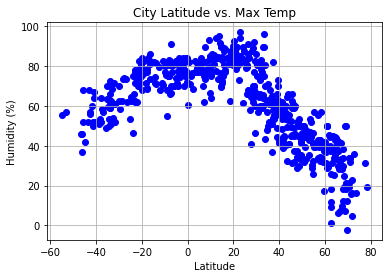

In [102]:
#Plotting Data
#Lattitude vs Temperature Plot  
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Max Temp")
plt.savefig("/Users/bennetyousuf/Desktop/BCS/python-api-challenge/WeatherPy/City Lattitude_vs_Humidity")
plt.show() 

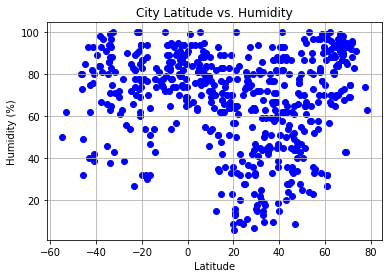

In [99]:
#Plotting Data
#Lattitude vs Humidity Plot  

plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
plt.savefig("/Users/bennetyousuf/Desktop/BCS/python-api-challenge/WeatherPy/City Lattitude_vs_Humidity")
plt.show() 


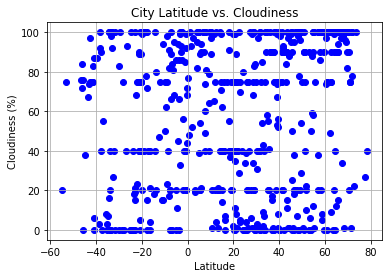

In [100]:
#Plotting Data
#Lattitude vs Cloudiness Plot

plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness")
plt.savefig("/Users/bennetyousuf/Desktop/BCS/python-api-challenge/WeatherPy/City Lattitude vs Cloudiness")
plt.show() 

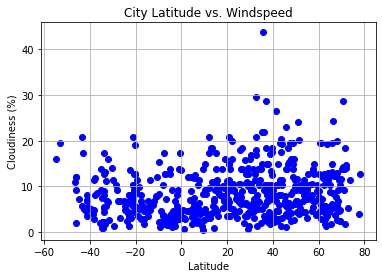

In [101]:
#Plotting Data
#Lattitude vs Windspeed Plot

plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Windspeed")
plt.savefig("/Users/bennetyousuf/Desktop/BCS/python-api-challenge/WeatherPy/City Lattitude vs Windspeed")
plt.show() 

In [40]:
#Linear Regression
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression 

# Create new Northern and Southern Hemisphere DataFrames to pull lat and max temp from
Northern_hemisphere_df = cities_df.loc[cities_df["Lat"]>0]
Southern_hemisphere_df = cities_df.loc[cities_df["Lat"]<0]

The r-value is: -0.8740646523142719


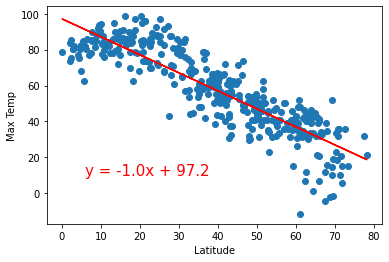

In [47]:
# Print out the r-squared value along with the plot.
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show() 


The r-value is: 0.7554044744898791


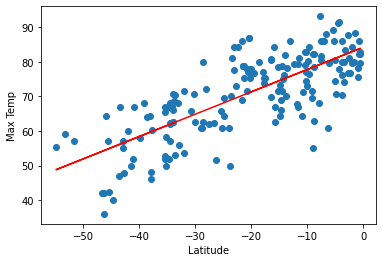

In [48]:
#Linear Regression
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression 
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.18033869709666617


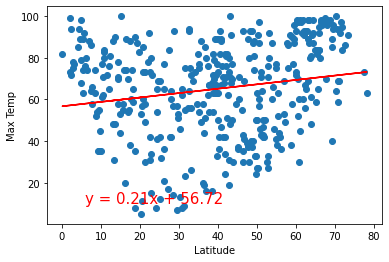

In [49]:
#Linear Regression
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.1002748648907667


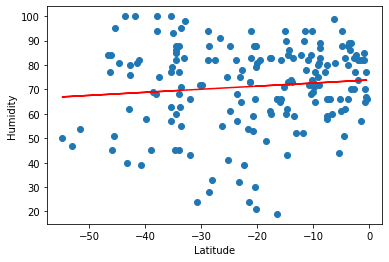

In [50]:
#Linear Regression
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.24178565094752796


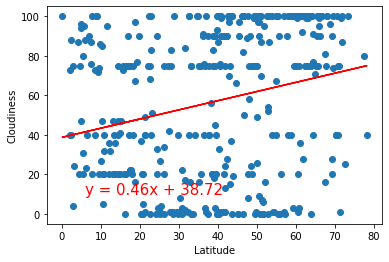

In [55]:
#Linear Regression
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: 0.1204819880071222


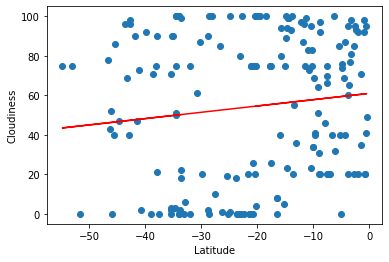

In [54]:
#Linear Regression
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}"
plt.show() 

The r-value is: 0.07601033294195911


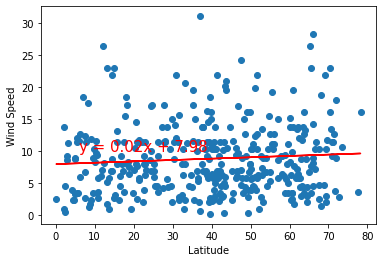

In [87]:
#Linear Regression
# Northern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression
x_values = Northern_hemisphere_df['Lat']
y_values = Northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show() 

The r-value is: -0.1728877031054576


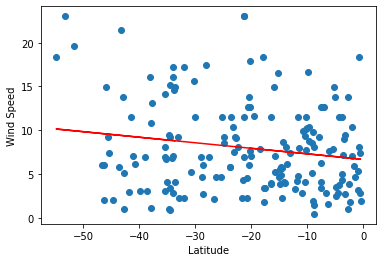

In [85]:
#Linear Regression
# Southern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression
x_values = Southern_hemisphere_df['Lat']
y_values = Southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show() 